In [1]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv("Imports_Exports_Dataset new.csv")
df.head(10)

,Transaction_ID,Country,Product,Import_Export,Shipping_Method,Port,Category,Quantity,Value,Date,Customs_Code,Weight
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,Air,Robertbury,Machinery,1979,9506.57,07-12-2023,620537,4248.65
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,Air,Shahport,Clothing,5763,7100.91,04-04-2023,927600,4340.81
2,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,Air,Adamfort,Furniture,2592,7226.42,09-05-2022,996084,4886.14
3,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,Air,Juliebury,Electronics,2622,2817.29,03-04-2023,555981,4406.74
4,23a7711a-8133-4876-b7eb-dcd9e87a1613,New Zealand,positive,Export,Sea,East Randall,Machinery,6975,657.80,23-07-2021,741778,1497.16
5,1846d424-c17c-4279-a3c6-612f48268673,Falkland Islands (Malvinas),back,Export,Land,Port Crystalview,Furniture,2746,8755.76,29-03-2022,816682,1692.01
6,fcbd04c3-4021-4ef7-8ca5-a5a19e4d6e3c,Bangladesh,population,Export,Air,Wrightburgh,Electronics,3582,9993.02,08-04-2020,950200,842.84
7,b4862b21-fb97-4435-8856-1712e8e5216a,Burundi,last,Export,Air,Ruizmouth,Furniture,5432,3027.55,13-12-2021,962651,1158.91
8,5487ce1e-af19-422a-99b8-a714e61a441c,Burundi,safe,Export,Air,Garciaville,Electronics,9558,1154.23,16-01-2022,412683,3676.36
9,8d723104-f773-43c1-b458-a748e9bb17bc,Malawi,understand,Export,Air,South Kennethmouth,Clothing,6484,9490.30,21-05-2020,778573,277.99


In [3]:
# Display info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Shipping_Method  15000 non-null  object 
 5   Port             15000 non-null  object 
 6   Category         15000 non-null  object 
 7   Quantity         15000 non-null  int64  
 8   Value            15000 non-null  float64
 9   Date             15000 non-null  object 
 10  Customs_Code     15000 non-null  int64  
 11  Weight           15000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.4+ MB


In [4]:
# Describe the dataframe
df.describe()

,Quantity,Value,Customs_Code,Weight
count,15000.000000,15000.000000,15000.00000,15000.000000
mean,4980.554733,5032.931120,549507.95920,2492.118859
std,2866.166690,2857.593897,260886.91886,1451.378507
min,1.000000,102.120000,100041.00000,0.570000
25%,2517.000000,2552.750000,325635.50000,1243.482500
50%,4958.500000,5045.705000,545432.00000,2476.135000
75%,7458.250000,7504.700000,777988.00000,3747.392500
max,10000.000000,9999.130000,999964.00000,4999.930000


In [5]:
# Check for null values
df.isnull().sum()

Transaction_ID     0
Country            0
Product            0
Import_Export      0
Shipping_Method    0
Port               0
Category           0
Quantity           0
Value              0
Date               0
Customs_Code       0
Weight             0
dtype: int64

In [6]:
# Display skewness
df.skew(numeric_only=True)

Quantity        0.019183
Value           0.008283
Customs_Code    0.016405
Weight          0.025247
dtype: float64

In [7]:
# Display Kurtosis
df.kurtosis(numeric_only=True)

Quantity       -1.182017
Value          -1.193535
Customs_Code   -1.205623
Weight         -1.208368
dtype: float64

In [11]:
def plot_weight_distribution_by_category(df, country="India"):
    """
    Plots the total weight distribution of products by category for a specified 
	country.

    Parameters:
    df (DataFrame): Pandas DataFrame containing at least 'Country', 'Category', 
					and 'Weight' columns.
    country (str): The country to filter the data on. Default is 'India'.

    Returns:
    None
    """
    # Filter the DataFrame to include only rows where the 'Country' matches the 
	# specified country
    df_country = df[df["Country"] == country]

    # Group the filtered data by 'Category' and calculate the sum of 'Weight' for 
	# each category
    weight_by_category = df_country.groupby("Category")["Weight"].sum()

    # Plot the aggregated weight data as a bar chart
    weight_by_category.plot(kind='bar', color='skyblue', edgecolor='black')

    # Set the y-axis label
    plt.ylabel("Weight")

    # Set the title of the plot
    plt.title(f"Weight Distribution by Category of Products in {country}")

    # Display the plot
    plt.show()


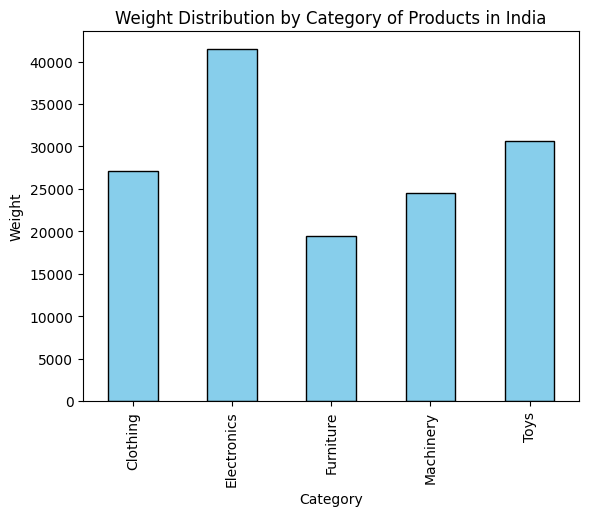

In [12]:
# Call the bar graph function
plot_weight_distribution_by_category(df)

In [13]:
def plot_import_export_trends(df, country="India"):
    """
    Plots the annual total import and export values for a specified country.

    Parameters:
    df (DataFrame): Pandas DataFrame containing at least 'Country', 'Date', 
					'Import_Export', and 'Value' columns.
    country (str): The country to filter the data on. Default is 'India'.

    Returns:
    None
    """
    # Filter the DataFrame for the specified country
    df_country = df[df["Country"] == country]

    # Extract the year from the 'Date' column and add it as a new 'Year' column
    df_country['Year'] = pd.DatetimeIndex(df_country['Date']).year

    # Group the data by 'Year' and 'Import_Export', then sum up the 'Value' for 
	# each group
    data_year_value = df_country.groupby(["Year", "Import_Export"])["Value"]\
								.sum().reset_index()

    # Set up the plot size
    plt.figure(figsize=(8, 5))

    # Plot the values for each 'Import_Export' category separately
    for label, df_subset in data_year_value.groupby('Import_Export'):
        plt.plot(df_subset['Year'], df_subset['Value'], marker='o', label=label)

    # Add a title and labels for the x and y axes
    plt.title("Total Value of Import and Export in India")
    plt.xlabel("Year")
    plt.ylabel("Value")

    # Display a legend to distinguish between import and export data
    plt.legend()

    # Show the plot
    plt.show()


C:\Users\anish\AppData\Local\Temp\ipykernel_23036\3659846664.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Year'] = pd.DatetimeIndex(df_country['Date']).year


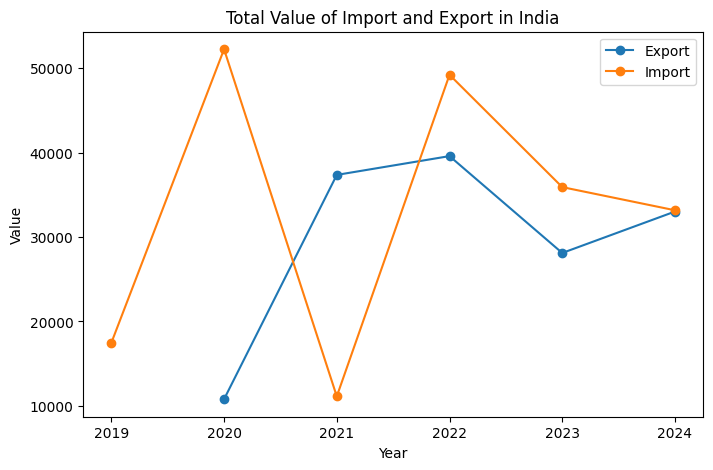

In [14]:
# call the line graph function 
plot_import_export_trends(df)

In [21]:
def plot_shipping_method_distribution(df):
    """
    Plots a pie chart showing the distribution of shipping methods.

    Parameters:
    df (DataFrame): Pandas DataFrame containing a 'Shipping_Method' column.

    Returns:
    None
    """
    # Count the occurrences of each shipping method
    grouped_data = df["Shipping_Method"].value_counts()

    # Set up the plot size
    plt.figure(figsize=(6, 6))

    # Plot a pie chart using the counts of each shipping method
    plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', 
			startangle=90)

    # Add a title to the plot
    plt.title("Distribution of Shipping Method")

    # Display the plot
    plt.show()


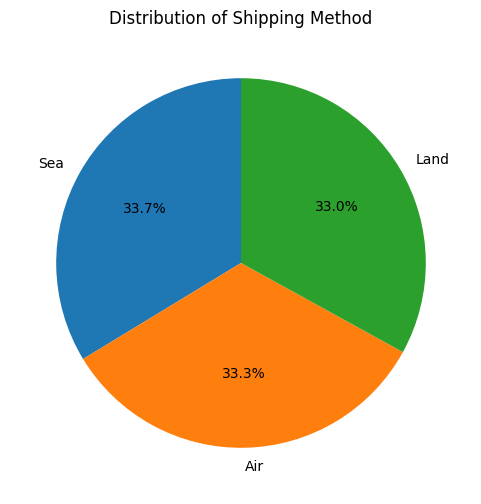

In [22]:
plot_shipping_method_distribution(df)

In [17]:
def plot_boxplot_variation(df, columns=["Quantity", "Value", "Weight"]):
    """
    Plots a boxplot to show the variation in specified columns.

    Parameters:
    df (DataFrame): Pandas DataFrame containing the specified columns to plot.
    columns (list): List of column names to include in the boxplot. Default is 
					["Quantity", "Value", "Weight"].

    Returns:
    None
    """
    # Create a boxplot for the specified columns in the DataFrame
    df.boxplot(column=columns)

    # Set plot title and label for the y-axis
    plt.title("Variation of Quantity, Value, and Weight")
    plt.ylabel("Count")

    # Display the plot
    plt.show()

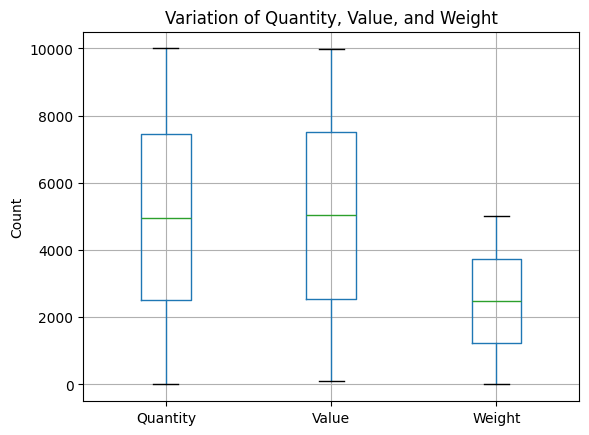

In [18]:
plot_boxplot_variation(df)

In [19]:
def plot_correlation_matrix(df):
    """
    Plots a heatmap of the correlation matrix for numeric columns in the DataFrame.

    Parameters:
    df (DataFrame): Pandas DataFrame containing numeric columns to calculate the 
					correlation matrix.

    Returns:
    None
    """
    # Select only the numeric columns from the DataFrame
    df_numeric = df.select_dtypes(include=['number'])

    # Calculate the correlation matrix for the numeric columns
    correlation = df_numeric.corr()

    # Set up the plot size
    plt.figure(figsize=(9, 6))

    # Plot the heatmap with the correlation matrix
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')

    # Set the title of the heatmap
    plt.title('Correlation Matrix')

    # Display the plot
    plt.show()


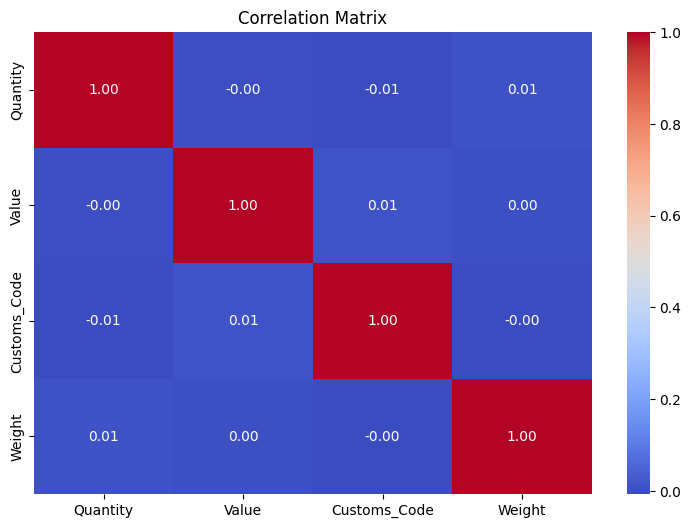

In [20]:
plot_correlation_matrix(df)